# **Optimize models: Pre-process data**
---
> This notebook entails optimizing the performance of the models in the previous notebook by **pre-processing the data**

## Load the data

In [1]:
# Import pandas
import pandas as pd

# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('daily-bike-share.csv')

--2024-06-01 10:22:32--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48800 (48K) [text/plain]
Saving to: ‘daily-bike-share.csv’

daily-bike-share.cs 100%[===================>]  47.66K  --.-KB/s    in 0.002s  

2024-06-01 10:22:32 (30.3 MB/s) - ‘daily-bike-share.csv’ saved [48800/48800]



In [2]:
# Extract features / inputs (X) and label (y)
# features/inputs (X):
X = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].copy()

# label (y):
y = bike_data['rentals']

numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit']

In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the data into training and validation / test sets 70% - 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Keep in mind that the resultant variables (X_train, X_test, y_train, y_test) are all DataFrames
type(X_train)

In [4]:
# define function for evaluation model, on VALIDATION DATASET
def evaluate_model(model):
  from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
  import numpy as np

  # Get predictions from the model passed
  y_pred = model.predict(X_test)

  # MSE
  mse = mean_squared_error(y_test, y_pred)
  # RMSE
  rmse = np.sqrt(mse)
  # R-squared
  r2 = r2_score(y_test, y_pred)
  # MAE
  mae = mean_absolute_error(y_test, y_pred)

  print(f"\nMSE: {round(mse, 2)}")
  print(f"MAE: {round(mae, 2)}")
  print(f"RMSE: {round(rmse, 2)}")
  print(f"R Squared: {round(r2, 3)}")

In [5]:
# Define a function to plot Predicted Label vs Actual Label + line of best fit
def plot_visual(model):
  # make predictions:
  y_pred = model.predict(X_test)

  import matplotlib.pyplot as plt
  # Import linregress to calculate linear least_squares regression for y_pred & y_test
  from scipy.stats import linregress
  result = linregress(y_test, y_pred)
  # f(x) = mx + b
  b = result.intercept
  m = result.slope
  # f(x)
  fx = pd.Series((m*y_test)+b)

  # figure and Axes
  fig, ax = plt.subplots(figsize=(5.5, 4))

  # scatter plot
  ax.scatter(x = y_test, y = y_pred, marker=".", color="#1b1b1b")

  # regression line
  ax.plot(y_test, fx, color = "#ff004f", linewidth=1.5)

  # Customize the plot with matplotlib methods
  ax.set_ylabel("Predicted Label Values", weight="black", fontsize=9.5)
  ax.set_xlabel("Actual Label Values", weight="black", fontsize=9.5)
  ax.set_title("Daily Bike Share Predictions (with Regression Line)")

  plt.show()

## Pre-processing the data
> In practice, it's common to perform some preprocessing of the data to make it easier for the algorithm to fit a model to it.

> There's a huge range of preprocessing transformations that can be performed to get data ready for modeling, but we'll limit ourselves to a few common techniques:
+ Scaling numeric features
+ Encoding categorical features

### Encoding categorical features
> Machine-learning models work best with numeric features rather than text values, so the need to convert categorical features into numeric representations. This can be achieved by either of the two techniques
+ [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder) - create individual binary (0 or 1) features for each possible category value  
+ [`OrdinalEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder) - substitute a unique integer value for each unique category

### Scaling numerical features
> Numeric features often have different scales and ranges. For example, one feature might range from 0 to 100 while another ranges from 0 to 100,000.

> Models like linear regression or neural networks are sensitive to the scale of input features. Features with larger scales might dominate the learning process, leading to biased or incorrect model predictions.

> Scaling numeric features helps in bringing all features to the same scale, preventing any one feature from dominating the learning process and improving the model's convergence and performance. Numerical feature scaling can be done using:  
+ [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.transform) - scales features to have a mean of 0 and a standard deviation of 1 to maintain the same spread of values on a different scale  
+ [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder) - calculates the minimum and maximum values for each column and assigns a proportional value a given range, typically between 0 and 1  

## Scikit-Learn [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline)  
> A Scikit-Learn feature that allows `list` a number of transformers to perform preprocessing on data, and apply an optional final _predictor._ Intermediate steps of the pipeline must be _transforms_, that is, they must implement `fit` and `transform` methods. The final _estimator_ only needs to implement `fit`

> Here are some common examples:  
>> **1. Estimators (Modeling Algorithms):**
+ Classifiers (e.g., `LogisticRegression`, `RandomForestClassifier`)
+ Regressors (e.g., `LinearRegression`, `RandomForestRegressor`)
+ Clustering algorithms (e.g., `KMeans`, `DBSCAN`)

>> **2. Transformers (Preprocessing and Feature Engineering):**   
+ Scaling methods (e.g., `StandardScaler`, `MinMaxScaler`)
+ Imputation techniques (e.g., [`SimpleImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer))
+ Feature selection methods (e.g., `SelectKBest`, `PCA`)
+ Text processing tools (e.g., `TfidfVectorizer`, `CountVectorizer`)

>> **3. Composite Estimators or Pipelines:**  
+ Pipelines themselves can be nested within other pipelines, allowing for complex preprocessing and modeling workflows.  

> A `Pipeline` object is created by passing a list of tuples. Each tuple contains a _name for the step_ and an _estimator / transformer object._
+ The _name of the step_ is user-defined and can be any string that is meaningful to the user. Example:  
```
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Step 1: StandardScaler
    ('svc', SVC())  # Step 2: SVC
])
```

In [6]:
# Import Pipeline, OneHotEncoder, StandardScaler, SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Specify transformer to encode categorical features
"""
handle_unknown="ignore"

When an unknown category is encountered during transform,
the resulting one-hot encoded columns for this feature will be all zeros.
In the inverse transform, an unknown category will be denoted as None.

strategy="most_frequent"
Replace missing using the most frequent value along each column

"""
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

In [7]:
# Specify transformer to scale numerical features
"""
strategy="mean"
Replace missing values using the mean along each column.
Can only be used with numeric data
"""
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("std_sc", StandardScaler())
])

## Scikit-Learn [`ColumnTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html#sklearn.compose.ColumnTransformer)  

> The `ColumnTransformer` in scikit-learn allows one to apply different transformers to different columns of the input data (`array` or `pandas` columns), enabling one to perform various preprocessing steps on specific subsets of features within the dataset.  

> It's particularly useful when you have heterogeneous data, where different columns require different preprocessing steps.

> Parameters:  
+ **transformers:** `list` of (name, transformer, columns) tuples specifying the transformer objects to be applied to subsets of the data, and specific columns.
>> + _namestr_ - a user-defined name of the transformer `Pipeline`
>> + _transformer / estimator_
>> + _columns:_ str, array-like of str, int, array-like of int, array-like of bool, slice or callable - Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name

> Example:  
```
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['numeric_feature']),
        ('cat', categorical_transformer, ['categorical_feature'])
    ])
```

In [8]:
# import ColumnTransformer
from  sklearn.compose import ColumnTransformer

# Now combining the cat_transformer and num_transformer preprocessing steps into one:
preprocessor = ColumnTransformer(transformers=[
    ("cat", cat_transformer, categorical_features),
    ("num", num_transformer, numeric_features)
])

## Create preprocessing and training `Pipeline`

### [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn-ensemble-randomforestregressor) algorithm

In [9]:
# import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Create pipeline with preprocessor + RandomForestRegressor
forest_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("regressor", RandomForestRegressor())
])

#### Fit the model

In [10]:
%%time
# Train model
forest_model = forest_pipeline.fit(X_train, y_train)

CPU times: user 939 ms, sys: 10.9 ms, total: 950 ms
Wall time: 987 ms


#### Plot predicted vs actual values

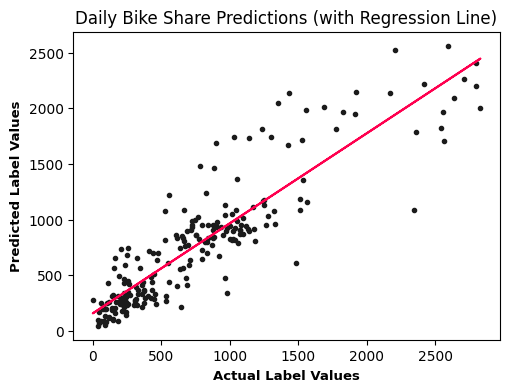

In [11]:
plot_visual(forest_model)

#### Evaluate the model

In [12]:
evaluate_model(forest_model)


MSE: 81344.08
MAE: 200.26
RMSE: 285.21
R Squared: 0.799


### [`GradientBoostingRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn-ensemble-gradientboostingregressor) algorithm

In [13]:
# import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Create pipeline with preprocessor + GradientBoostingRegressor
gb_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("regressor", GradientBoostingRegressor())
])

#### Fit the model

In [14]:
%%time
# Train the model
gb_model = gb_pipeline.fit(X_train, y_train)

CPU times: user 245 ms, sys: 781 µs, total: 246 ms
Wall time: 259 ms


#### Plot predicted vs actual values

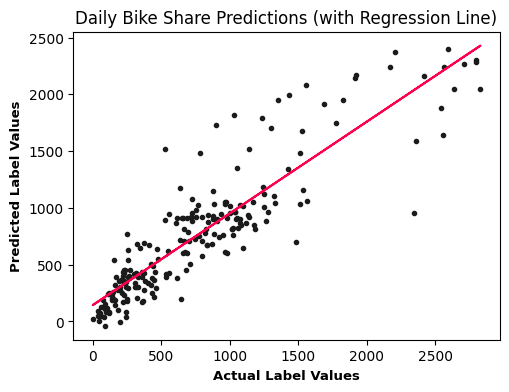

In [15]:
plot_visual(gb_model)

#### Evaluate the model

In [16]:
evaluate_model(gb_model)


MSE: 79737.94
MAE: 197.6
RMSE: 282.38
R Squared: 0.802


### [`XGBRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn-ensemble-gradientboostingregressor) algorithm

In [17]:
# Import xgboost
from xgboost import XGBRegressor

# Create a pipeline with preprocessor + XGBRegressor
xgb_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("regressor", XGBRegressor(objective="reg:squarederror"))
])

#### Train the model

In [18]:
%%time
# Train the model
xgb_model = xgb_pipeline.fit(X_train, y_train)

CPU times: user 403 ms, sys: 20.9 ms, total: 424 ms
Wall time: 357 ms


#### Plot predicted vs actual values

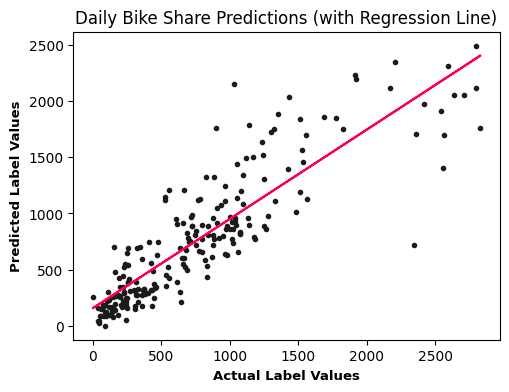

In [19]:
plot_visual(xgb_model)

#### Evaluate the model

In [20]:
evaluate_model(xgb_model)


MSE: 95963.46
MAE: 212.51
RMSE: 309.78
R Squared: 0.762


### [`LGBMRegressor`](https://lightgbm.readthedocs.io/en/stable/pythonapi/lightgbm.LGBMRegressor.html#lightgbm-lgbmregressor) algorithm

In [21]:
# import LightGBM Regressor
from lightgbm import LGBMRegressor

# create a pipeline with preprocessor + LGBMRegressor
lgbm_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor), # pre-process
    ("lgbm", LGBMRegressor()) # estimator
])

#### Train the model

In [ ]:
%%time

# train the model
lgbm_model = lgbm_pipeline.fit(X_train, y_train)

#### Plot predicted vs actual values

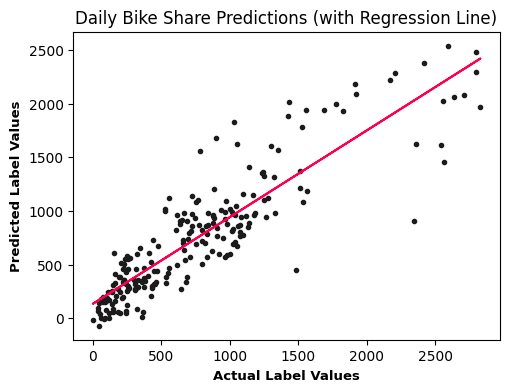

In [23]:
plot_visual(lgbm_model)

#### Evaluate the model

In [24]:
evaluate_model(lgbm_model)


MSE: 85393.92
MAE: 205.38
RMSE: 292.22
R Squared: 0.788


## Conclusion
> In the previous notebook, the models were trained with data that was loaded straight from a source file, with only moderately successful results.

> In this notebook, however, the models were loaded with pre-processed data (scaled numeric columns and encoded categorical columns). The results had a significant difference, as models loaded with pre-processed data had **better** evaluation metrics.